In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
#load and split
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel vals
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 9s 0us/step


Text(0.5, 0, 'horse')

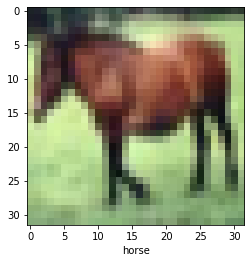

In [10]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [15]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5197 - accuracy: 0.4435 - val_loss: 1.2509 - val_accuracy: 0.5487
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1637 - accuracy: 0.5871 - val_loss: 1.1153 - val_accuracy: 0.6078
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0026 - accuracy: 0.6463 - val_loss: 0.9810 - val_accuracy: 0.6573
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9045 - accuracy: 0.6831 - val_loss: 0.9246 - val_accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8226 - accuracy: 0.7108 - val_loss: 0.8995 - val_accuracy: 0.6895
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7668 - accuracy: 0.7315 - val_loss: 0.8584 - val_accuracy: 0.7085
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7158 - accuracy: 0.7495 - val_loss: 0.8450 -

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8582 - accuracy: 0.7198 - 923ms/epoch - 3ms/step

Test accuracy: 0.7197999954223633
